In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.dpi"] = 300
plt.style.use("seaborn")

In [3]:
data = pd.read_csv("data3a.csv", dtype={"y": int, "x": float, "f": "category"})

data.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


data には、最初の列yには種子数、xには個体の体サイズ、fには施肥処理の値が入っている。

In [5]:
data.shape

(100, 3)

In [7]:
data["f"]

0     C
1     C
2     C
3     C
4     C
     ..
95    T
96    T
97    T
98    T
99    T
Name: f, Length: 100, dtype: category
Categories (2, object): ['C', 'T']

In [8]:
data.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


In [9]:
data["f"].describe()

count     100
unique      2
top         C
freq       50
Name: f, dtype: object

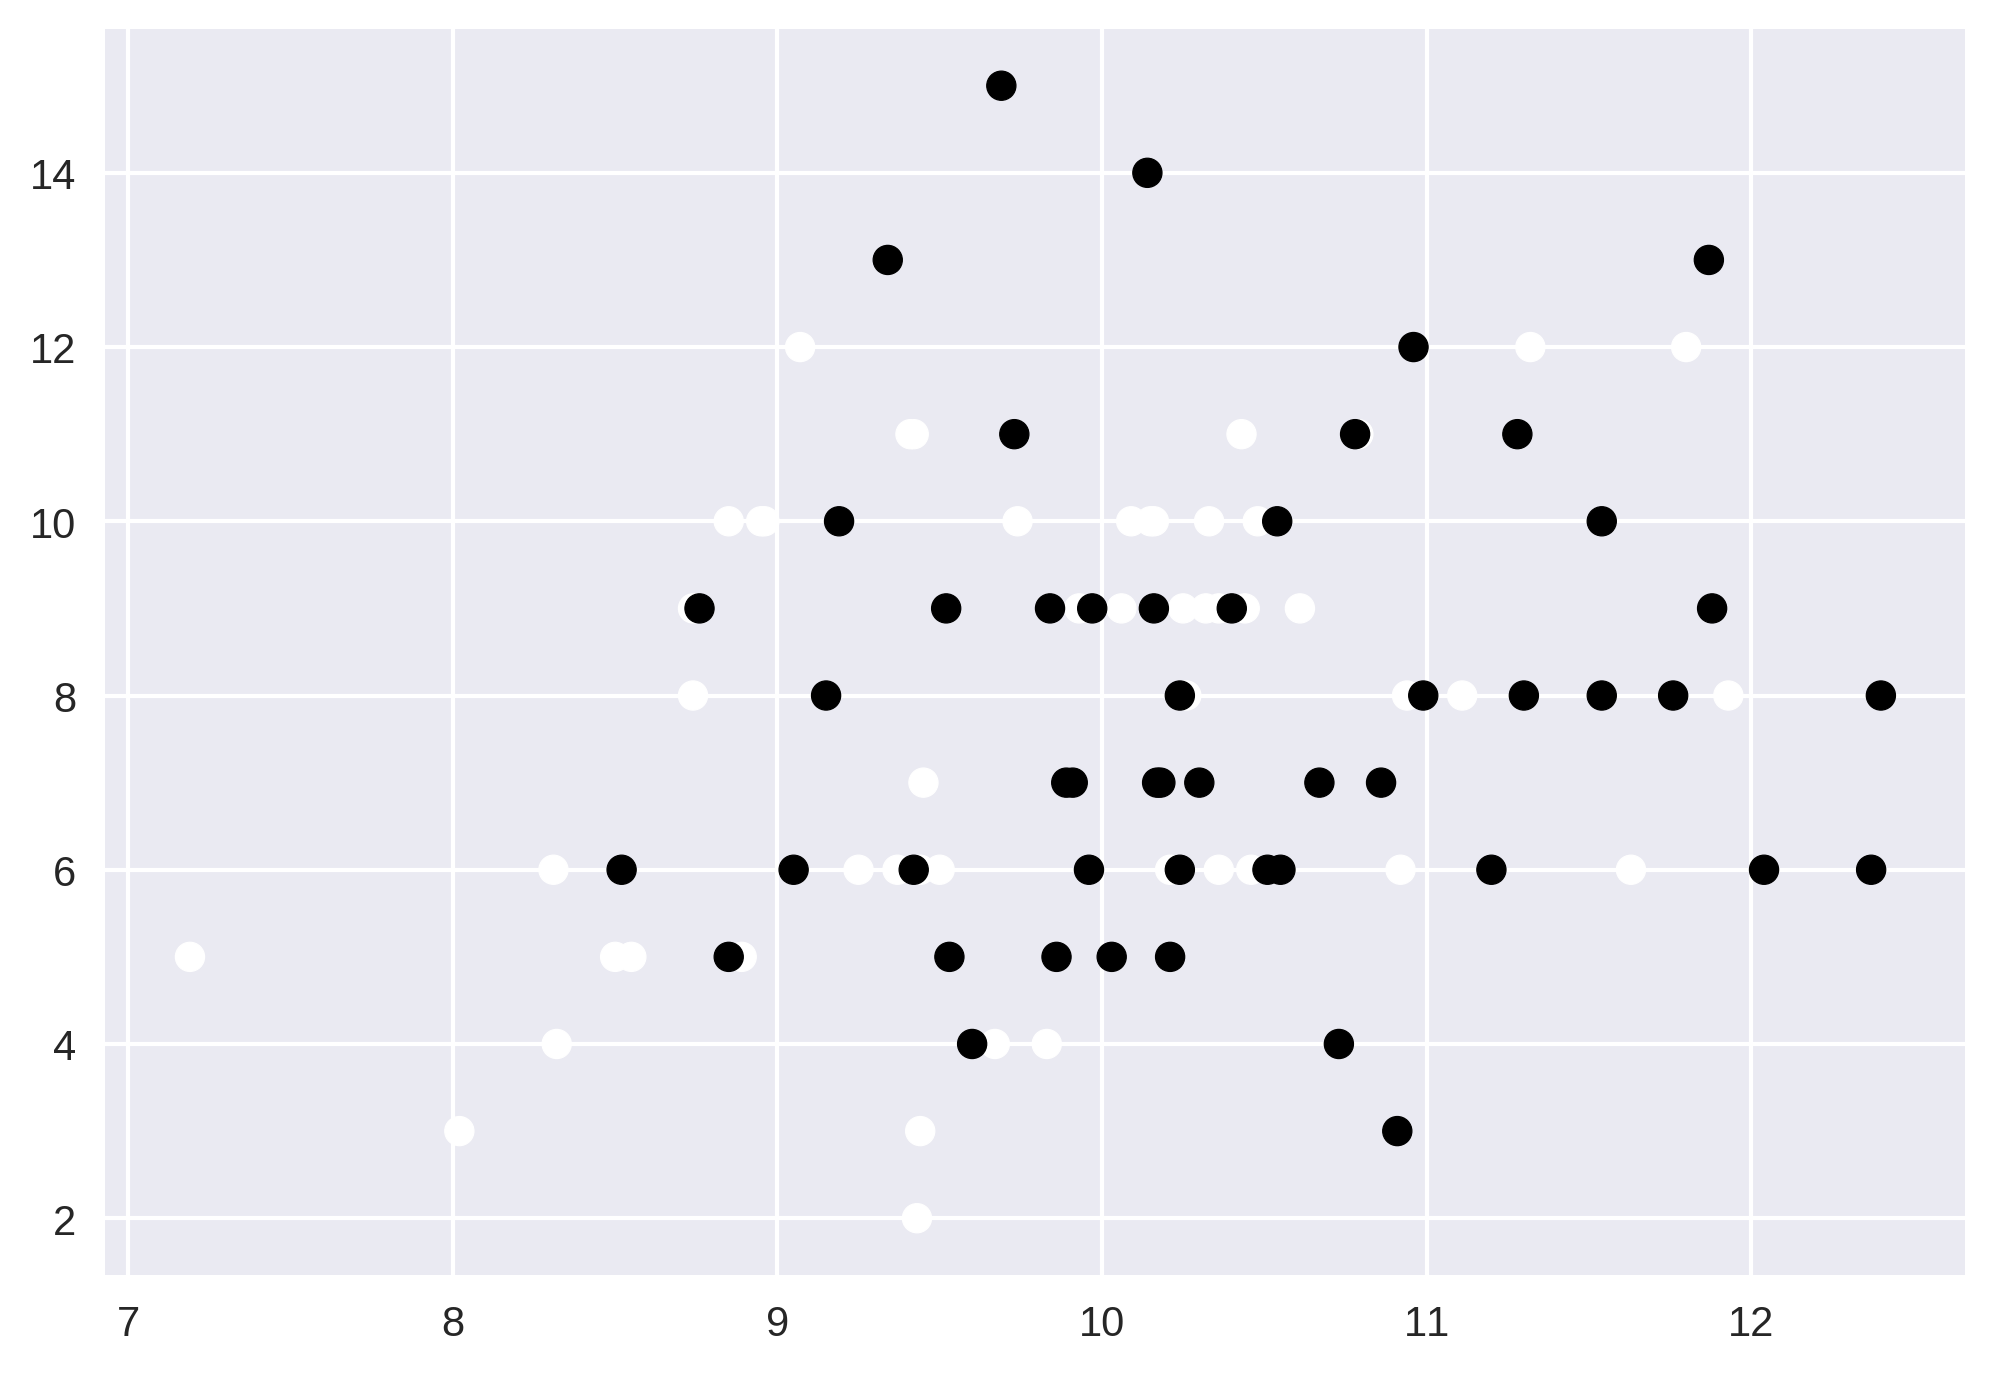

In [10]:
# scatter plot
plt.scatter(data["x"], data["y"], c=data["f"].cat.codes)

<AxesSubplot:title={'center':'y'}, xlabel='f'>

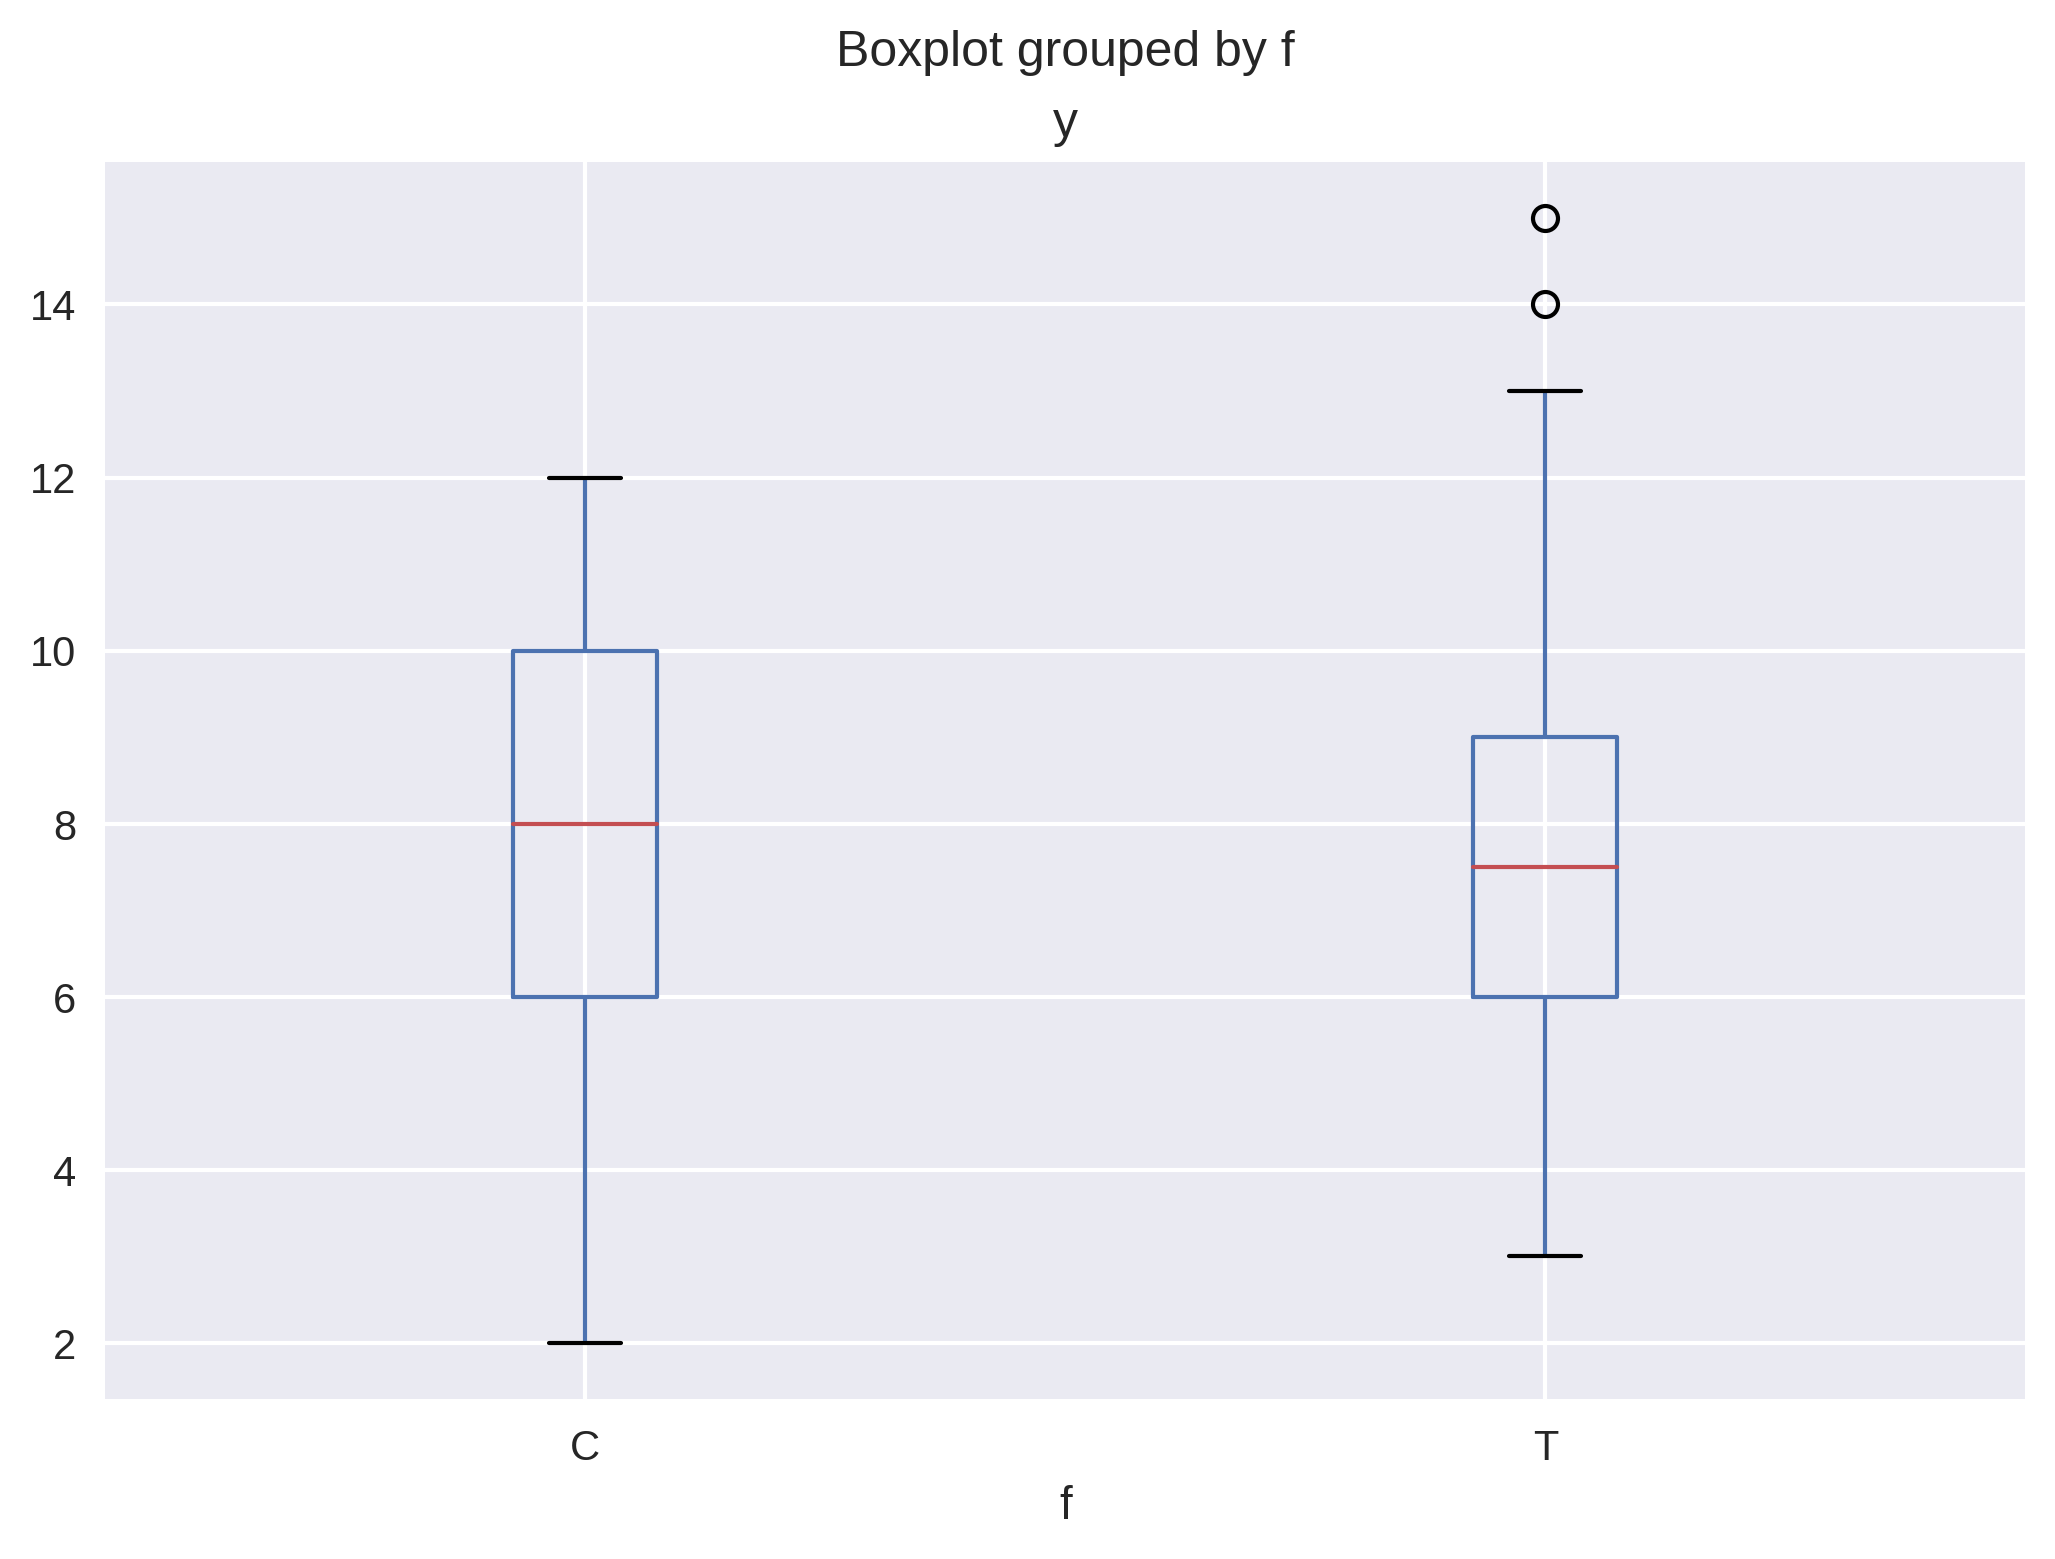

In [11]:
# box plot
data.boxplot(column="y", by="f")

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.glm(formula="y ~ x", data=data, family=sm.families.Poisson())

In [13]:
result = model.fit()

In [14]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Wed, 01 Jun 2022   Deviance:                       84.993
Time:                        06:34:10   Pearson chi2:                     83.8
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04414
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [15]:
# 最大対数尤度
result.llf

-235.38625076986077

In [16]:
# 自由度
result.df_model

1

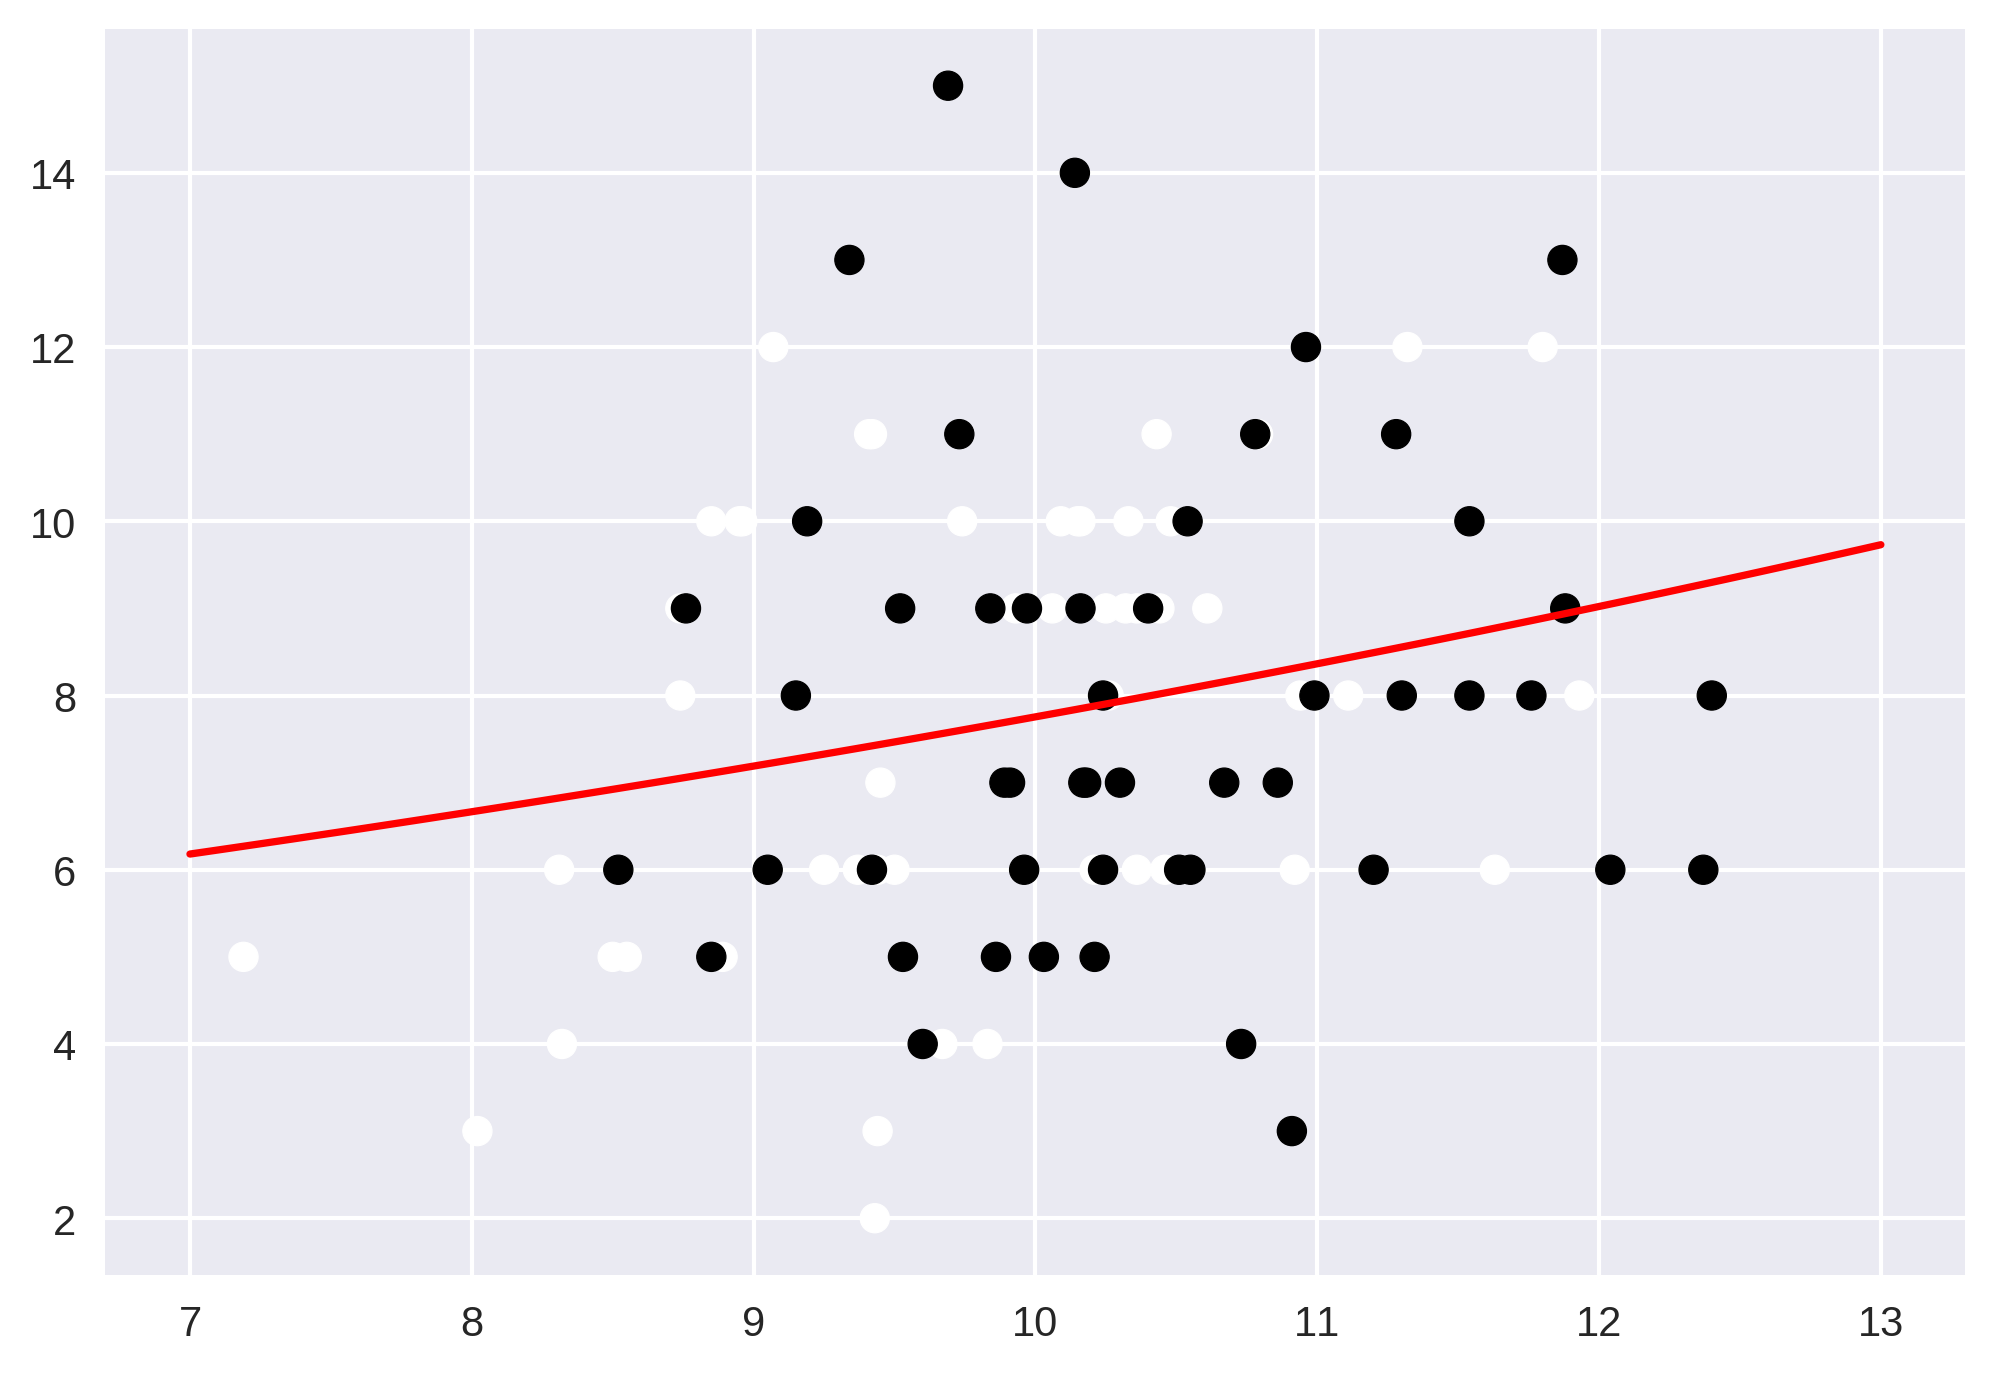

In [17]:
x = np.linspace(7, 13, 100)
y = np.exp(result.params["Intercept"] + x * result.params["x"])

plt.scatter(data["x"], data["y"], c=data["f"].cat.codes)
plt.plot(x, y, color="red")
plt.show()

説明変数が因子型の統計モデル

In [18]:
model = smf.glm(formula="y ~ f", data=data, family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Wed, 01 Jun 2022   Deviance:                       89.475
Time:                        06:39:26   Pearson chi2:                     87.1
No. Iterations:                     4   Pseudo R-squ. (CS):          0.0003192
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.000       1.952       2.151
f[T.T]         0.0128      0.071      0.179      0.858      -0.127       0.153
==============================================================================
"""

説明変数が数量型＋因子型の統計モデル

In [19]:
model = smf.glm("y ~ x + f", data=data, family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Wed, 01 Jun 2022   Deviance:                       84.808
Time:                        06:40:46   Pearson chi2:                     83.8
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04590
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.001       0.539       1.988
f[T.T]        -0.0320      0.074     -0.430      0.667      -0.178       0.114
x              0.0801      0.037      2.162      0.031       0.007       0.153
==============================================================================
"""